<a href="https://colab.research.google.com/github/JessicaMishra/leaf-train/blob/master/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d jessicamishra/dataset

 95% 193M/204M [00:02<00:00, 72.7MB/s]
100% 204M/204M [00:02<00:00, 92.2MB/s]


In [ ]:
!unzip "*.zip"

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
bs=64

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("train"), valid_pct=0.2, bs=64, size=224)

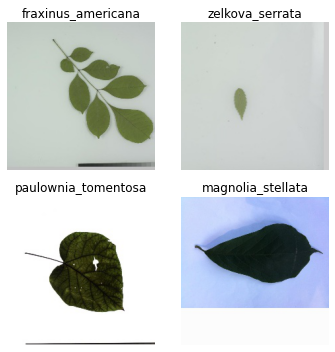

In [ ]:
data.show_batch(rows=2, figsize=(5,5))

In [ ]:
print(data.classes)
len(data.classes)

['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum', 'acer_negundo', 'acer_palmatum', 'acer_pensylvanicum', 'acer_platanoides', 'acer_pseudoplatanus', 'acer_rubrum', 'acer_saccharinum', 'acer_saccharum', 'aesculus_flava', 'aesculus_glabra', 'aesculus_hippocastamon', 'aesculus_pavi', 'ailanthus_altissima', 'albizia_julibrissin', 'amelanchier_arborea', 'amelanchier_canadensis', 'amelanchier_laevis', 'asimina_triloba', 'betula_alleghaniensis', 'betula_jacqemontii', 'betula_lenta', 'betula_nigra', 'betula_populifolia', 'broussonettia_papyrifera', 'carpinus_betulus', 'carpinus_caroliniana', 'carya_cordiformis', 'carya_glabra', 'carya_ovata', 'carya_tomentosa', 'castanea_dentata', 'catalpa_bignonioides', 'catalpa_speciosa', 'cedrus_atlantica', 'cedrus_deodara', 'cedrus_libani', 'celtis_occidentalis', 'celtis_tenuifolia', 'cercidiphyllum_japonicum', 'cercis_canadensis', 'chamaecyparis_pisifera', 'chamaecyparis_thyoides', 'chionanthus_retusus', 'chionanthu

185

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.097740,1.181986,0.674767,02:42
1,1.088511,0.652667,0.804172,02:45
2,0.699188,0.446558,0.866140,02:45
3,0.395419,0.294041,0.909478,02:45
4,0.209202,0.238107,0.927501,02:45
5,0.149451,0.215200,0.929931,02:46


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.948695,0.975802,0.708991,03:50
1,0.209625,0.140926,0.950992,03:48


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


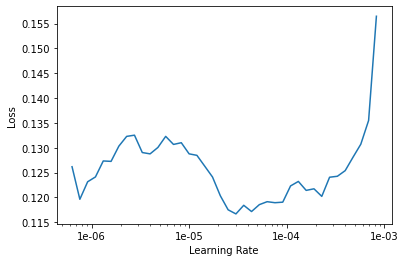

In [ ]:
learn.unfreeze() 
learn.lr_find()
learn.recorder.plot()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

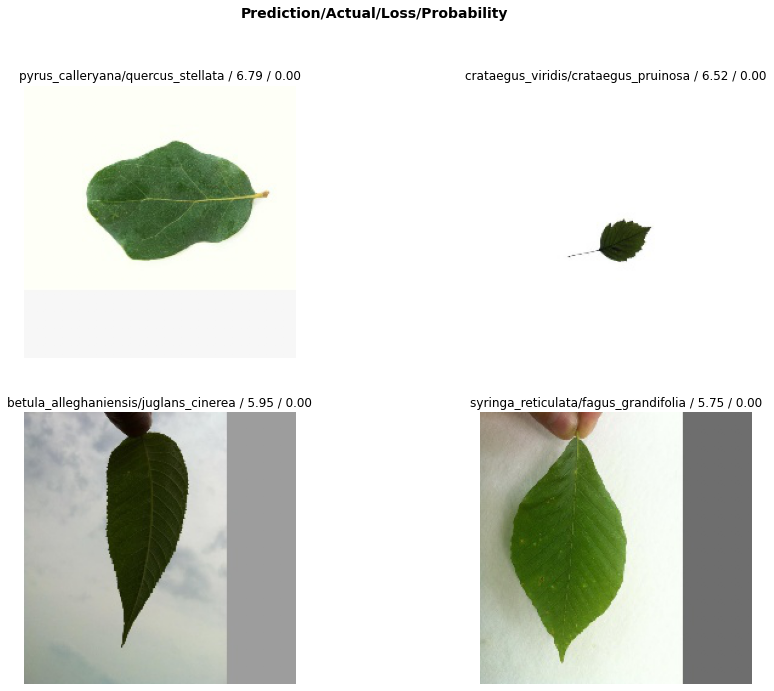

In [ ]:
interp.plot_top_losses(4, figsize=(15,11))

In [ ]:
os.makedirs("/content/leaves/",exist_ok=True)

In [ ]:
my_dir="/content/leaves/"

In [ ]:
learn.save(my_dir+"/stage-1")

In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
!pip install -U kora

In [ ]:
from kora.drive import upload_public

In [ ]:
url_is = upload_public(my_dir+"/export.pkl")
url_is

'https://drive.google.com/uc?id=1nUxKu0TU4OEO5lXZl1FBcoyCl0_q0oDh'

In [ ]:
from kora.drive import upload_public
url_of = upload_public(my_dir+"/stage-1.pth")
url_of

'https://drive.google.com/uc?id=1Cw7q1jAucdlZ5NwN8gLXlQnoXv8sJ230'